# EDA
`Exploratory Data Analysis` adalah proses yang memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya.

Dalam proses ini pemahaman konteks data juga diperhatikan karena akan menjawab masalah - masalah dasar.

# 1. Import Libraries
Import library yang akan digunakan

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

# 2. Load Dataset
Load dataset hasil Crawling dengan menggunakan tweepy sebelumnya

In [12]:
# Load Dataset
data1 = pd.read_csv('Data Final\Data_4_Prepro_rem\Indihome.csv', sep=',')


## Dataset info

Menampilkan banyak data dan Dtype tiap kolomnya.

In [13]:
# Info
for i in [data1]:
    i.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12875 entries, 0 to 12874
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          12875 non-null  int64 
 1   Data Teks_Stemming  12874 non-null  object
dtypes: int64(1), object(1)
memory usage: 201.3+ KB



In [14]:
# # Merge Info
# data = pd.concat([data1,data2,data3])
# data.info()

In [15]:
# Melihat banyak Tweet perhari
data['Tanggal'] = pd.to_datetime(data['Tanggal'])
tph = data['Data Teks'].groupby(data['Tanggal'].dt.date).count()
frek = tph.values
h_index = {6:'Minggu',0:'Senin',1:'Selasa',2:'Rabu',3:'Kamis',4:'Jumat',5:"Sabtu"}
hari = [x.weekday() for x in tph.index]
hari = [h_index[x] for x in hari] 
for i in range(len(hari)):
    hari[i] = str(tph.index[i]) + f'\n{hari[i]}'

NameError: name 'data' is not defined

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


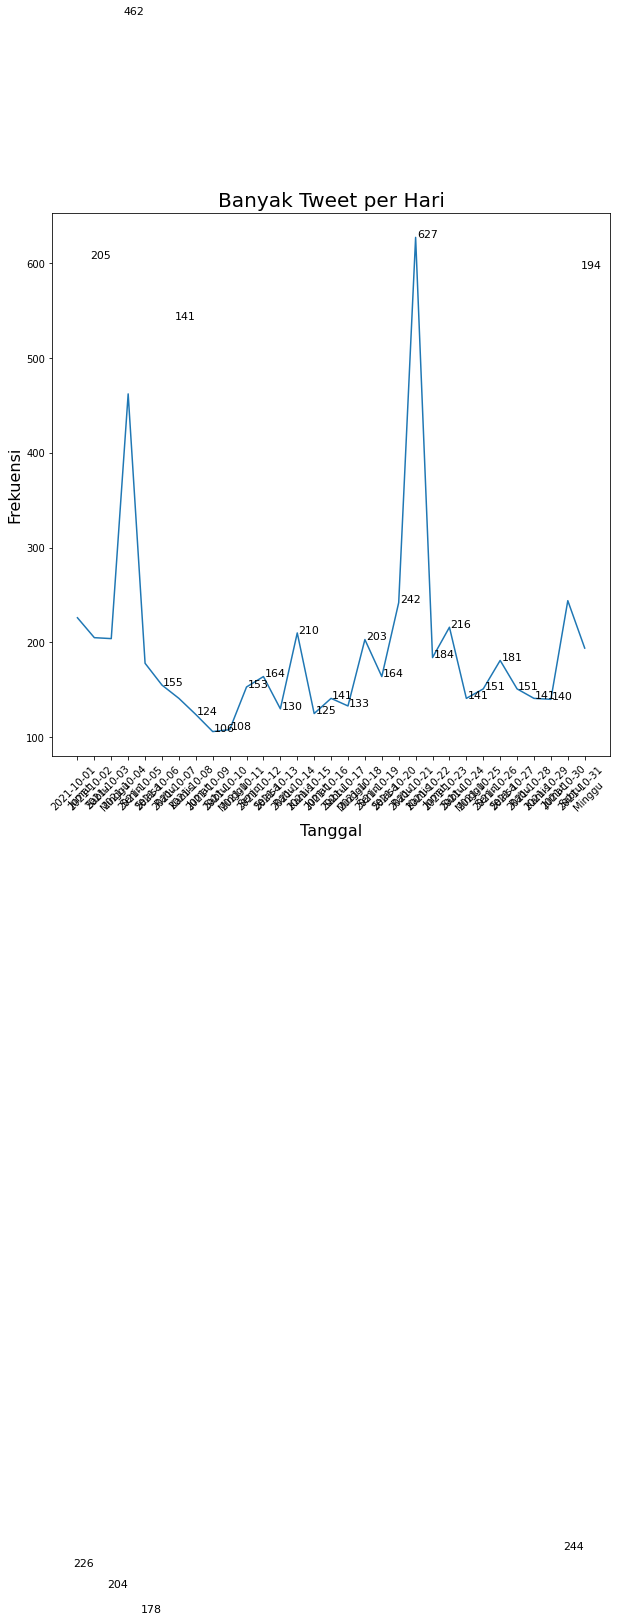

In [ ]:
# Plotting Line
plt.figure(figsize = (10,10))
sns.lineplot(range(len(frek)), frek)
for i, v in enumerate(frek.tolist()):
    if i == 0 or i==2 or i ==4 or i == len(tph.values)-2:
        plt.text(i-.25, v - 1000, str(v),fontsize=11)
    elif i == 1 or i == 3 or i==6 or i == len(tph.values)-1:
        plt.text(i-.25, v + 400, str(v),fontsize=11)
    else :
        plt.text(i+.07, v, str(v),fontsize=11)
plt.title('Banyak Tweet per Hari',fontsize=20)
plt.xticks(range(len(tph.values)), hari, rotation=45)
plt.xlabel('Tanggal',fontsize=16)
plt.ylabel('Frekuensi',fontsize=16)
plt.show()

In [ ]:
# Melihat banyak Tweet perjam
tpj = []
for i in range(1,len(tph.index)) :
    if i != len(tph.index)-1 :
        tpj.append(data['Tanggal'][(data['Tanggal'] >= str(tph.index[i])) & (data['Tanggal']<str(tph.index[i+1]))])
    else :
        tpj.append(data['Tanggal'][data['Tanggal']>=str(tph.index[i])])
tpj = [x.groupby(x.dt.hour).count() for x in tpj]

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

IndexError: index 2 is out of bounds for axis 0 with size 2

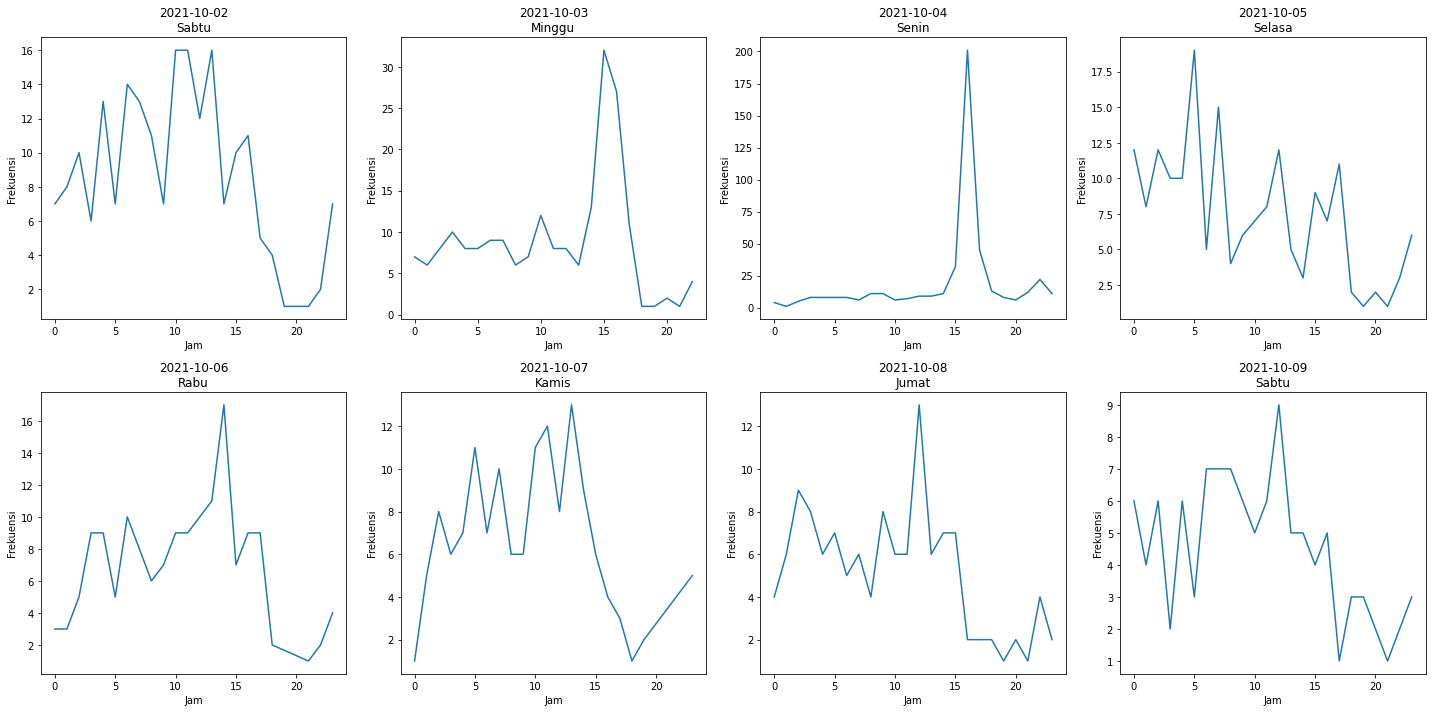

In [ ]:
# Ploting Line
fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(20,10))
for i in range(len(tpj)):
    sns.lineplot(tpj[i].index.tolist(),tpj[i].values,ax=axes[i//4,i%4])
    axes[i//4,i%4].set_title(f'{hari[i+1]}')
    axes[i//4,i%4].set(xlabel = 'Jam', ylabel = 'Frekuensi')
    plt.tight_layout()
#fig.suptitle('Banyak Tweet per Jam',fontsize=24)
plt.show()

In [ ]:
# # Menghitung perbandingan tweet dan retweet
# r_stat = data['Retweet Status'].groupby(data['Retweet Status']).count()
# temp = r_stat.values

KeyError: 'Retweet Status'

In [ ]:
# # Plotting Pie
# def func(pct, allvals):
#     absolute = int(pct/100.*np.sum(allvals))
#     return "{:.1f}%\n{:d}".format(pct, absolute)

# plt.figure(figsize = (8,8))
# plt.pie(temp,explode=(0.1,0),labels=['Tweet','Retweet'],shadow=True,colors=['#A3FBFF','#ADFFA3'],
#         autopct=lambda pct: func(pct, temp),startangle=90)
# plt.title('Perbandingan Jumlah Tweet dan Retweet',fontsize=18)
# plt.axis('equal')
# plt.legend(fontsize=11)
# plt.show()

In [ ]:
# # Menghitung banyak hashtag terkait
# hashtag = data['Hashtags'].tolist()
# temp = []
# freks = []
# for x in hashtag:
#     if x != []:
#         x = x.translate(str.maketrans('', '', string.punctuation))
#         x = x.lower().split()
#         for i in x :
#             if i not in temp :
#                 temp.append(i)
#                 freks.append(1)
#             else :
#                 freks[temp.index(i)] += 1
# hashtag_ = pd.DataFrame({'Hashtag':temp,'Frekuensi':freks})
# hashtag_ = hashtag_.sort_values(by='Frekuensi', ascending=False)

KeyError: 'Hashtags'

In [ ]:
# # Plot 20 hashtag terbanyak
# hmm = hashtag_.head(20)
# plt.figure(figsize = (10,10))
# sns.barplot(x = hmm['Hashtag'],y = hmm['Frekuensi'])
# for i, v in enumerate(hmm['Frekuensi'].tolist()):
#     plt.text(i-len(str(v))/10, v + 50, str(v),fontsize=10)
# plt.title('Hashtag Terbanyak',fontsize=20)
# plt.xticks(rotation=90)
# plt.xlabel('Hashtag',fontsize=16)
# plt.ylabel('Frekuensi',fontsize=16)
# plt.show()

In [ ]:
# # Source count
# source = data['Source'].groupby(data['Source']).count()
# source = pd.DataFrame({'Source' : source.index.tolist(),'Frekuensi' : source.values})
# source = source.sort_values(by='Frekuensi', ascending=False)

In [ ]:
# # Plot 20 Source terbanyak
# hm = source.head(20)
# plt.figure(figsize = (10,10))
# sns.barplot(x = hm['Source'],y = hm['Frekuensi'])
# for i, v in enumerate(hm['Frekuensi'].tolist()):
#     plt.text(i-len(str(v))/10, v + 1000, str(v),fontsize=10)
# plt.title('Source Terbanyak',fontsize=20)
# plt.xticks(rotation=90)
# plt.xlabel('Source',fontsize=16)
# plt.ylabel('Frekuensi',fontsize=16)
# plt.show()